In [5]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [9]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [10]:
from citipy import citipy

In [11]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

624

In [12]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [13]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=932eea3c9418d5072ded84bddf4da0c9


In [14]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [15]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    
   

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | petropavlovsk-kamchatskiy
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | hamilton
Processing Record 5 of Set 1 | langcangan
Processing Record 6 of Set 1 | cape town
Processing Record 7 of Set 1 | tasiilaq
Processing Record 8 of Set 1 | hermanus
Processing Record 9 of Set 1 | ancud
Processing Record 10 of Set 1 | havre-saint-pierre
Processing Record 11 of Set 1 | ixtapa
Processing Record 12 of Set 1 | puerto ayora
Processing Record 13 of Set 1 | mount gambier
Processing Record 14 of Set 1 | masvingo
Processing Record 15 of Set 1 | puerto colombia
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | puerto del rosario
Processing Record 18 of Set 1 | dikson
Processing Record 19 of Set 1 | tuatapere
Processing Record 20 of Set 1 | husavik
Processing Record 21 of Set 1 | portland
Processing Record 22 of Set 1 | lagoa
Proc

Processing Record 34 of Set 4 | linqiong
Processing Record 35 of Set 4 | kruisfontein
Processing Record 36 of Set 4 | meulaboh
Processing Record 37 of Set 4 | ajaccio
Processing Record 38 of Set 4 | bulgan
Processing Record 39 of Set 4 | faanui
Processing Record 40 of Set 4 | teya
Processing Record 41 of Set 4 | east london
Processing Record 42 of Set 4 | uruzgan
Processing Record 43 of Set 4 | saldanha
Processing Record 44 of Set 4 | nioro
Processing Record 45 of Set 4 | mount isa
Processing Record 46 of Set 4 | vysha
Processing Record 47 of Set 4 | borovoy
Processing Record 48 of Set 4 | mahebourg
Processing Record 49 of Set 4 | ribeira grande
Processing Record 50 of Set 4 | chokurdakh
Processing Record 1 of Set 5 | bjala
City not found. Skipping...
Processing Record 2 of Set 5 | alekseyevka
Processing Record 3 of Set 5 | dhidhdhoo
Processing Record 4 of Set 5 | te anau
Processing Record 5 of Set 5 | saint-francois
Processing Record 6 of Set 5 | samusu
City not found. Skipping...
Pro

Processing Record 21 of Set 8 | plaster rock
Processing Record 22 of Set 8 | bone
Processing Record 23 of Set 8 | valdivia
Processing Record 24 of Set 8 | sinop
Processing Record 25 of Set 8 | bengkulu
Processing Record 26 of Set 8 | gwadar
Processing Record 27 of Set 8 | san quintin
Processing Record 28 of Set 8 | batagay-alyta
Processing Record 29 of Set 8 | touros
Processing Record 30 of Set 8 | esperance
Processing Record 31 of Set 8 | ocos
Processing Record 32 of Set 8 | eston
Processing Record 33 of Set 8 | dunedin
Processing Record 34 of Set 8 | paola
Processing Record 35 of Set 8 | tigil
Processing Record 36 of Set 8 | san cristobal
Processing Record 37 of Set 8 | umzimvubu
City not found. Skipping...
Processing Record 38 of Set 8 | namatanai
Processing Record 39 of Set 8 | kandrian
Processing Record 40 of Set 8 | dvinskoy
Processing Record 41 of Set 8 | perth
Processing Record 42 of Set 8 | torbay
Processing Record 43 of Set 8 | namibe
Processing Record 44 of Set 8 | tres lago

Processing Record 9 of Set 12 | beroroha
Processing Record 10 of Set 12 | utiroa
City not found. Skipping...
Processing Record 11 of Set 12 | channel-port aux basques
Processing Record 12 of Set 12 | haibowan
City not found. Skipping...
Processing Record 13 of Set 12 | faya
Processing Record 14 of Set 12 | iqaluit
Processing Record 15 of Set 12 | antsohihy
Processing Record 16 of Set 12 | sorong
Processing Record 17 of Set 12 | umm durman
City not found. Skipping...
Processing Record 18 of Set 12 | boysun
Processing Record 19 of Set 12 | burica
City not found. Skipping...
Processing Record 20 of Set 12 | maracacume
Processing Record 21 of Set 12 | chudniv
Processing Record 22 of Set 12 | dubbo
Processing Record 23 of Set 12 | daru
Processing Record 24 of Set 12 | cap malheureux
Processing Record 25 of Set 12 | celestun
Processing Record 26 of Set 12 | rodez
Processing Record 27 of Set 12 | pimenta bueno
Processing Record 28 of Set 12 | bolshegrivskoye
City not found. Skipping...
Proces

In [17]:
len(city_data)

563

In [21]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.1927,168.8643,51.48,77,11,2.80,NZ,2022-05-11 21:52:16
1,Petropavlovsk-Kamchatskiy,53.0452,158.6483,48.79,50,75,4.47,RU,2022-05-11 21:52:16
2,Rikitea,-23.1203,-134.9692,77.23,82,10,20.33,PF,2022-05-11 21:52:17
3,Hamilton,39.1834,-84.5333,86.76,44,15,4.00,US,2022-05-11 21:52:17
4,Langcangan,8.4794,123.7558,75.83,94,61,3.58,PH,2022-05-11 21:52:18
5,Cape Town,-33.9258,18.4232,56.12,88,0,4.61,ZA,2022-05-11 21:50:02
6,Tasiilaq,65.6145,-37.6368,21.63,85,90,2.24,GL,2022-05-11 21:52:20
7,Hermanus,-34.4187,19.2345,57.45,78,0,5.75,ZA,2022-05-11 21:52:20
8,Ancud,-41.8697,-73.8203,49.28,88,100,14.36,CL,2022-05-11 21:52:21
9,Havre-Saint-Pierre,50.2334,-63.5986,55.76,44,100,10.36,CA,2022-05-11 21:52:22


In [24]:
new_column_order = ["City", "Country","Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df= city_data_df[new_column_order]

In [26]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mataura,NZ,2022-05-11 21:52:16,-46.1927,168.8643,51.48,77,11,2.80
1,Petropavlovsk-Kamchatskiy,RU,2022-05-11 21:52:16,53.0452,158.6483,48.79,50,75,4.47
2,Rikitea,PF,2022-05-11 21:52:17,-23.1203,-134.9692,77.23,82,10,20.33
3,Hamilton,US,2022-05-11 21:52:17,39.1834,-84.5333,86.76,44,15,4.00
4,Langcangan,PH,2022-05-11 21:52:18,8.4794,123.7558,75.83,94,61,3.58
5,Cape Town,ZA,2022-05-11 21:50:02,-33.9258,18.4232,56.12,88,0,4.61
6,Tasiilaq,GL,2022-05-11 21:52:20,65.6145,-37.6368,21.63,85,90,2.24
7,Hermanus,ZA,2022-05-11 21:52:20,-34.4187,19.2345,57.45,78,0,5.75
8,Ancud,CL,2022-05-11 21:52:21,-41.8697,-73.8203,49.28,88,100,14.36
9,Havre-Saint-Pierre,CA,2022-05-11 21:52:22,50.2334,-63.5986,55.76,44,100,10.36


In [28]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [29]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

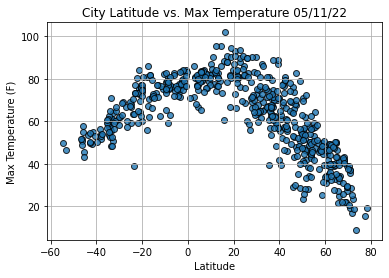

In [30]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

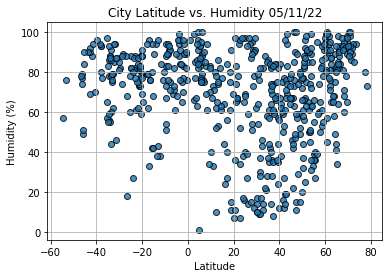

In [31]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

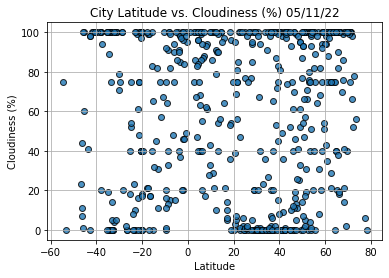

In [34]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

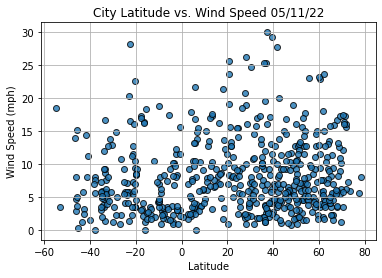

In [35]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()